In [59]:
import sklearn.cluster
import sklearn.metrics
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
train_data = pd.read_csv(os.path.join(os.path.split(os.getcwd())[0], "SYD_DAT_5/data/sydtrains.csv"), index_col=1, thousands=',')

In [61]:
trains2014 = train_data[train_data.YEAR == 2014].copy()

In [62]:
trains2014

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID
STATION,,,,,,,,,,,,,,,,,,
Central,CBD,2014,6/05/2014,Yes,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110,1,101
Town Hall,CBD,2014,7/05/2014,Yes,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620,2,102
Wynyard,CBD,2014,20/05/2014,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103
Parramatta,Western,2014,19/11/2014,Yes,660,330,7790,13700,7400,7020,14960,8660,4150,5260,34960,34960,4,905
North Sydney,North Shore,2014,19/08/2014,Yes,270,270,2340,18340,4450,5590,17760,3050,3790,1360,28610,28610,5,1402
Redfern,CBD,2014,1/05/2014,Yes,250,250,3910,10690,5350,8170,12510,4250,3660,2320,25680,25680,6,108
Chatswood,North Shore,2014,19/08/2014,Yes,210,200,5030,8200,4710,4930,9430,6000,2820,2860,22200,22200,7,1407
Bondi Junction,Eastern Suburbs,2014,2/09/2014,Yes,210,210,10150,4350,4370,4600,5240,8330,1910,4380,21880,21880,8,203
Strathfield,Inner West,2014,9/09/2014,Yes,190,190,7900,4050,4980,3950,5540,7230,2100,5280,20710,20710,9,1110


In [63]:
interesting_cols = trains2014[['OUT_0600_0930','IN_0600_0930']]

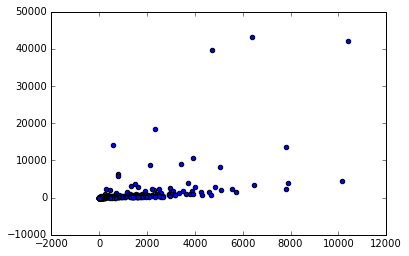

In [64]:
plt.scatter(interesting_cols.IN_0600_0930, interesting_cols.OUT_0600_0930)

In [103]:
clusterer = sklearn.cluster.KMeans(init='k-means++', n_clusters=2)

In [104]:
two_clustering = clusterer.fit_predict(interesting_cols)

In [105]:
rainbow = np.array(['red','blue','green','orange','purple','cyan','teal'])

In [106]:
two_cents = clusterer.cluster_centers_

In [107]:
two_cents

array([[   732.03278689,   1117.40983607],
       [ 41633.33333333,   7160.        ]])

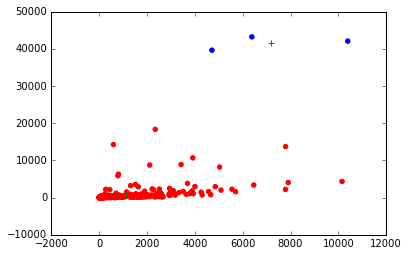

In [108]:
plt.scatter(interesting_cols.IN_0600_0930, interesting_cols.OUT_0600_0930, 
            color=rainbow[two_clustering])
plt.scatter(two_cents[:,1],two_cents[:,0], marker="+", s=30, color="green")

In [109]:
cluster_centers = {}
cluster_membership = {}
for cluster_count in range(3,15):
    km = sklearn.cluster.KMeans(init='k-means++', n_clusters=cluster_count)
    cluster_membership[cluster_count] = km.fit_predict(interesting_cols)
    cluster_centers[cluster_count] = km.cluster_centers_

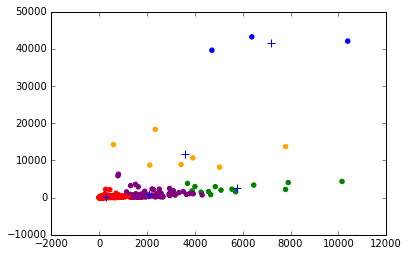

In [110]:
plt.scatter(interesting_cols.IN_0600_0930,
           interesting_cols.OUT_0600_0930,
           color=rainbow[cluster_membership[5]])
plt.scatter(cluster_centers[5][:,1],
            cluster_centers[5][:,0],
           marker="+", s=50)

# to make a bit of sense of the centres put them on the same scales
#plt.xlim([0,50000])
#plt.ylim([0,50000])

In [111]:
trains2014['five_cluster_membership'] = rainbow[cluster_membership[5]]

In [112]:
trains2014

,LINE,YEAR,SURVEY_DATE_USED,WHETHER_SURVEYED,IN_0200_0600,OUT_0200_0600,IN_0600_0930,OUT_0600_0930,IN_0930_1500,OUT_0930_1500,IN_1500_1830,OUT_1500_1830,IN_1830_0200,OUT_1830_0200,IN_24_HOURS,OUT_24_HOURS,RANK,STATION_SORT_ID,five_cluster_membership
STATION,,,,,,,,,,,,,,,,,,,
Central,CBD,2014,6/05/2014,Yes,940,920,10390,42070,21400,30150,45370,16270,19010,7700,97110,97110,1,101,blue
Town Hall,CBD,2014,7/05/2014,Yes,880,880,6380,43210,16930,23550,43670,15270,21760,6720,89620,89620,2,102,blue
Wynyard,CBD,2014,20/05/2014,Yes,590,570,4710,39620,9200,11180,35010,6510,10690,2330,60200,60200,3,103,blue
Parramatta,Western,2014,19/11/2014,Yes,660,330,7790,13700,7400,7020,14960,8660,4150,5260,34960,34960,4,905,orange
North Sydney,North Shore,2014,19/08/2014,Yes,270,270,2340,18340,4450,5590,17760,3050,3790,1360,28610,28610,5,1402,orange
Redfern,CBD,2014,1/05/2014,Yes,250,250,3910,10690,5350,8170,12510,4250,3660,2320,25680,25680,6,108,orange
Chatswood,North Shore,2014,19/08/2014,Yes,210,200,5030,8200,4710,4930,9430,6000,2820,2860,22200,22200,7,1407,orange
Bondi Junction,Eastern Suburbs,2014,2/09/2014,Yes,210,210,10150,4350,4370,4600,5240,8330,1910,4380,21880,21880,8,203,green
Strathfield,Inner West,2014,9/09/2014,Yes,190,190,7900,4050,4980,3950,5540,7230,2100,5280,20710,20710,9,1110,green


In [113]:
two_cluster_silhouette_score = sklearn.metrics.silhouette_score(interesting_cols, two_clustering)

In [114]:
two_cluster_silhouette_score

0.9457809055255304

In [115]:
s = {}
for cluster_count in range(3,15):
    s[cluster_count] = sklearn.metrics.silhouette_score(interesting_cols, cluster_membership[cluster_count])
    print(cluster_count, s[cluster_count])

3 0.824303583537
4 0.665944102122
5 0.608947260052
6 0.622049677055
7 0.61764417988
8 0.625195309082
9 0.630553211589
10 0.5959243482
11 0.60274463996
12 0.601419264921
13 0.565598393782
14 0.590301821797


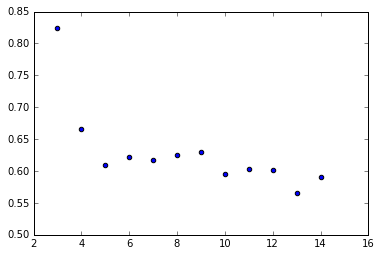

In [117]:
plt.scatter(list(s.keys()),list(s.values()))